<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

For reference, here is a commented computation of fan_in and fan_out. It's mainly helpful for convolutional layers where we have to take into account the receptive field size.  

The source code is from pytorch's [nn.init](https://pytorch.org/docs/stable/_modules/torch/nn/init.html#xavier_uniform_)  

The main refactor was to use a shape directly, instead of a tensor.  

In [1]:
#| echo: false
#| output: asis
show_doc(get_complex_inits)

---

### get_complex_inits

>      get_complex_inits (shape, seed=None, criterion='he', dtype='float32')

Initializes complex-valued Rayleigh weights from a PyTorch module.

Creating complex weights for a few layers

In [ ]:
# re-create out earlier example with a single layer
fan_in, fan_out = 100, 50
criterion = 'he'

# get the complex-valued weights
real_weights, imag_weights = get_complex_inits((fan_out, fan_in), criterion=criterion)

# create a pair of linear layers with our weight
dnn_real = torch.nn.Linear(fan_in, fan_out)
dnn_imag = torch.nn.Linear(fan_in, fan_out)

# set the complex weight
dnn_real.weight = real_weights
dnn_imag.weight = imag_weights

In [ ]:
# check if the weights are rayleigh distributed
rw = dnn_real.weight.detach().numpy().ravel()
iw = dnn_imag.weight.detach().numpy().ravel()
linear_mag = np.sqrt(rw**2 + iw**2)

Find the matching theoretical Rayleigh pdf for comparison

In [ ]:
# define the Rayleigh PDF
def rayleigh_pdf(x, sigma):
    "Evaluates the Rayleigh PDF at a given point `x`."
    p = (x / sigma**2) * np.exp(-x**2 / (2*sigma**2)) # see if you can match this code to the equation above
    return p

# get the PDF for comparison
sigma_he = 1. / np.sqrt(fan_in) # NOTE: we used He criteria
points = np.linspace(0, linear_mag.max(), 1000)
ray_pdf = rayleigh_pdf(points, sigma=sigma_he)

In [ ]:
import matplotlib.pyplot as plt

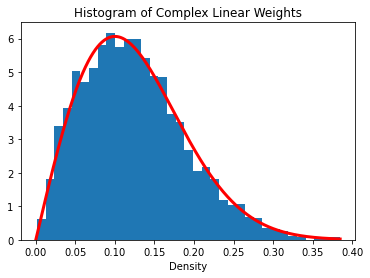

In [ ]:
plt.figure()
plt.title('Histogram of Complex Linear Weights')
plt.xlabel('Sample Value')
plt.xlabel('Density')
plt.hist(linear_mag, bins=35, density=True);
plt.plot(points, ray_pdf, c='r', linewidth=3);